**PRIYANKA RAJU**

**SJSU ID: 013839865**

**Import split_folders to split the images into train and test data**

In [0]:
# import split_folders
# split_folders.ratio('train', output="output", seed=1337, ratio=(.8, .2)) 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

from keras.layers import MaxPooling2D
from keras.losses import categorical_crossentropy
from keras.models import Sequential
import keras.layers as layers

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import random
import seaborn as sns
sns.set()

Using TensorFlow backend.


In [0]:
! pip install matplotlib==3.1.0

In [0]:
img_width, img_height = 32, 32

In [0]:
train_data_dir = 'drive/My Drive/CMPE-255/output/train'
validation_data_dir = 'drive/My Drive/CMPE-255/output/val'
test_data_dir = 'drive/My Drive/CMPE-255/output/test'

# number of epochs to train model
epochs = 50
# batch size used by flow_from_directory and predict_generator
batch_size = 32

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [0]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

print(len(train_generator.filenames))
print(train_generator.class_indices)
print(len(train_generator.class_indices))

Found 17943 images belonging to 10 classes.
17943
{'c0': 0, 'c1': 1, 'c2': 2, 'c3': 3, 'c4': 4, 'c5': 5, 'c6': 6, 'c7': 7, 'c8': 8, 'c9': 9}
10


In [0]:
valid_generator = valid_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
print(len(valid_generator.filenames))
print(valid_generator.class_indices)
print(len(valid_generator.class_indices))

Found 4490 images belonging to 10 classes.
4490
{'c0': 0, 'c1': 1, 'c2': 2, 'c3': 3, 'c4': 4, 'c5': 5, 'c6': 6, 'c7': 7, 'c8': 8, 'c9': 9}
10


In [0]:
train_labels = train_generator.classes
num_classes = len(train_generator.class_indices)
train_labels = to_categorical(train_labels, num_classes=num_classes)
train_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [0]:
num_classesV = len(valid_generator.class_indices)
validation_labels = valid_generator.classes
validation_labels = to_categorical(validation_labels, num_classes=num_classesV)
validation_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [0]:
warnings.filterwarnings("ignore")
model = Sequential()
#Layer 1
#Conv Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,3)))
#Pooling layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))
#Layer 2
#Conv Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))
#Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))
#Flatten
model.add(Flatten())
#Layer 3
#Fully connected layer 1
model.add(Dense(units = 120, activation = 'relu'))
#Layer 4
#Fully connected layer 2
model.add(Dense(units = 84, activation = 'relu'))
#Layer 5
#Output Layer
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_5 (Dense)              (None, 84)               

In [0]:
STEP_SIZE_TRAIN=train_generator.n//150
STEP_SIZE_VALID=valid_generator.n//150
train_generator.reset()
valid_generator.reset()

In [0]:
warnings.filterwarnings("ignore")
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

Epoch 1/10
119/119 [==============================] - 1020s 9s/step - loss: 1.9903 - acc: 0.2723 - val_loss: 1.8181 - val_acc: 0.3200
Epoch 2/10
119/119 [==============================] - 868s 7s/step - loss: 1.6921 - acc: 0.3837 - val_loss: 1.6300 - val_acc: 0.3944
Epoch 3/10
119/119 [==============================] - 887s 7s/step - loss: 1.4892 - acc: 0.4575 - val_loss: 1.3659 - val_acc: 0.4752
Epoch 4/10
119/119 [==============================] - 876s 7s/step - loss: 1.3065 - acc: 0.5378 - val_loss: 1.2831 - val_acc: 0.5226
Epoch 5/10
119/119 [==============================] - 556s 5s/step - loss: 1.1169 - acc: 0.6029 - val_loss: 1.0380 - val_acc: 0.6258
Epoch 6/10
119/119 [==============================] - 32s 272ms/step - loss: 0.9995 - acc: 0.6518 - val_loss: 0.9637 - val_acc: 0.6692
Epoch 7/10
119/119 [==============================] - 32s 271ms/step - loss: 0.9437 - acc: 0.6696 - val_loss: 0.9410 - val_acc: 0.6821
Epoch 8/10
119/119 [==============================] - 32s 272ms/

In [0]:
loss,acc = model.evaluate_generator(generator=valid_generator)

In [0]:
model.history.history

{'acc': [0.27232142857142855,
  0.38366596638655465,
  0.457752040049753,
  0.5378151260504201,
  0.6029411764705882,
  0.6517857142857143,
  0.6696428571428571,
  0.7098214285714286,
  0.7520400106702927,
  0.7794117647058824],
 'loss': [1.990269892355975,
  1.6920562171134628,
  1.4884377498317938,
  1.3065046898457182,
  1.116914350445531,
  0.9995063312915193,
  0.9437336207938796,
  0.8371137693649581,
  0.7294109546689492,
  0.6745774355255255],
 'val_acc': [0.32004310344827586,
  0.39439655172413796,
  0.47521551724137934,
  0.5226293103448276,
  0.6258278145695364,
  0.6691810344827587,
  0.6821120689655172,
  0.7058189655172413,
  0.7456896551724138,
  0.7737306843267108],
 'val_loss': [1.8181359562380561,
  1.629986364265968,
  1.3658760498309959,
  1.2831423035983383,
  1.0380279245492374,
  0.9636694984189396,
  0.9409650091467232,
  0.8774580976058697,
  0.7704148323371492,
  0.6472249121197539]}

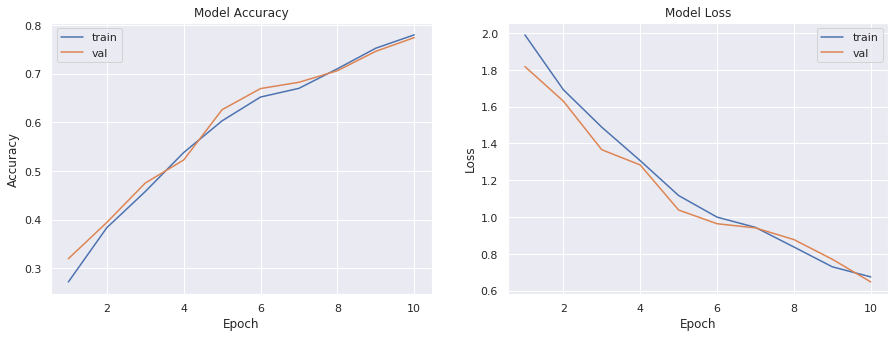

In [0]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
# summarize history for accuracy
axs[0].plot(range(1,len(model.history.history['acc'])+1),model.history.history['acc'])
axs[0].plot(range(1,len(model.history.history['val_acc'])+1),model.history.history['val_acc'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_xticks(np.arange(1,len(model.history.history['acc'])+1),len(model.history.history['acc'])/10)
axs[0].legend(['train', 'val'], loc='best')
# summarize history for loss
axs[1].plot(range(1,len(model.history.history['loss'])+1),model.history.history['loss'])
axs[1].plot(range(1,len(model.history.history['val_loss'])+1),model.history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_xticks(np.arange(1,len(model.history.history['loss'])+1),len(model.history.history['loss'])/10)
axs[1].legend(['train', 'val'], loc='best')
plt.show()

In [0]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)
len(y_pred)

4490

In [0]:
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))
print('Classification Report')
target_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[59 73 44 48 37 39 39 53 48 58]
 [48 55 45 52 45 37 35 47 31 59]
 [56 47 57 46 49 45 46 37 36 45]
 [62 48 51 43 41 56 55 43 33 38]
 [60 52 46 50 45 39 44 43 26 61]
 [61 59 55 41 29 59 44 47 26 42]
 [46 50 61 52 40 49 43 52 29 43]
 [51 50 49 37 36 38 30 50 31 29]
 [56 45 31 35 29 42 29 39 40 37]
 [56 51 39 36 39 41 42 46 35 41]]
Classification Report
              precision    recall  f1-score   support

          c0       0.11      0.12      0.11       498
          c1       0.10      0.12      0.11       454
          c2       0.12      0.12      0.12       464
          c3       0.10      0.09      0.09       470
          c4       0.12      0.10      0.11       466
          c5       0.13      0.13      0.13       463
          c6       0.11      0.09      0.10       465
          c7       0.11      0.12      0.12       401
          c8       0.12      0.10      0.11       383
          c9       0.09      0.10      0.09       426

    accuracy                      

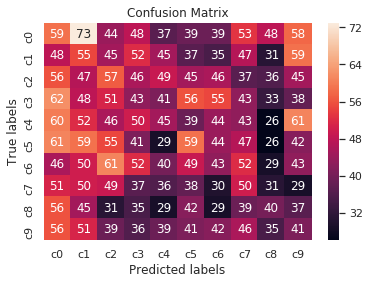

<Figure size 504x504 with 0 Axes>

In [0]:
ax= plt.subplot()
df_cm = pd.DataFrame(
        confusion_matrix(valid_generator.classes, y_pred), index=target_names, columns=target_names
)
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, ax = ax,fmt='d'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);


**Building AlexNet Model**

In [0]:
img_widthAN, img_heightAN = 224, 224
train_datagenAN = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagenAN = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [0]:
train_generatorAN = train_datagenAN.flow_from_directory(
    train_data_dir,
    target_size=(img_widthAN, img_heightAN),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

print(len(train_generatorAN.filenames))
print(train_generatorAN.class_indices)
print(len(train_generatorAN.class_indices))

Found 17943 images belonging to 10 classes.
17943
{'c0': 0, 'c1': 1, 'c2': 2, 'c3': 3, 'c4': 4, 'c5': 5, 'c6': 6, 'c7': 7, 'c8': 8, 'c9': 9}
10


In [0]:
valid_generatorAN = valid_datagenAN.flow_from_directory(
    validation_data_dir,
    target_size=(img_widthAN, img_heightAN),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
print(len(valid_generatorAN.filenames))
print(valid_generatorAN.class_indices)
print(len(valid_generatorAN.class_indices))

Found 4490 images belonging to 10 classes.
4490
{'c0': 0, 'c1': 1, 'c2': 2, 'c3': 3, 'c4': 4, 'c5': 5, 'c6': 6, 'c7': 7, 'c8': 8, 'c9': 9}
10


In [0]:
from keras.layers.normalization import BatchNormalization
# (3) Create a sequential model
modelAN = Sequential()

# 1st Convolutional Layer
modelAN.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),strides=(4,4), padding='valid'))
modelAN.add(Activation('relu'))
# Pooling 
modelAN.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
modelAN.add(BatchNormalization())

# 2nd Convolutional Layer
modelAN.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
modelAN.add(Activation('relu'))
# Pooling
modelAN.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
modelAN.add(BatchNormalization())

# 3rd Convolutional Layer
modelAN.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
modelAN.add(Activation('relu'))
# Batch Normalisation
modelAN.add(BatchNormalization())

# 4th Convolutional Layer
modelAN.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
modelAN.add(Activation('relu'))
# Batch Normalisation
modelAN.add(BatchNormalization())

# 5th Convolutional Layer
modelAN.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
modelAN.add(Activation('relu'))
# Pooling
modelAN.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
modelAN.add(BatchNormalization())

# Passing it to a dense layer
modelAN.add(Flatten())
# 1st Dense Layer
modelAN.add(Dense(4096, input_shape=(224*224*3,)))
modelAN.add(Activation('relu'))
# Add Dropout to prevent overfitting
modelAN.add(Dropout(0.4))
# Batch Normalisation
modelAN.add(BatchNormalization())

# 2nd Dense Layer
modelAN.add(Dense(4096))
modelAN.add(Activation('relu'))
# Add Dropout
modelAN.add(Dropout(0.4))
# Batch Normalisation
modelAN.add(BatchNormalization())

# 3rd Dense Layer
modelAN.add(Dense(1000))
modelAN.add(Activation('relu'))
# Add Dropout
modelAN.add(Dropout(0.4))
# Batch Normalisation
modelAN.add(BatchNormalization())

# Output Layer
modelAN.add(Dense(10))
modelAN.add(Activation('softmax'))

# modelAN.summary()

# Compile the model
modelAN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
modelAN.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_144 (Activation)  (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_145 (Activation)  (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 8, 8, 256)       

In [0]:
STEP_SIZE_TRAIN=train_generatorAN.n//128
STEP_SIZE_VALID=valid_generatorAN.n//128
train_generatorAN.reset()
valid_generatorAN.reset()

In [0]:
warnings.filterwarnings("ignore")
modelAN.fit_generator(generator=train_generatorAN,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generatorAN,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

Epoch 1/10
140/140 [==============================] - 805s 6s/step - loss: 2.7555 - acc: 0.1915 - val_loss: 2.2450 - val_acc: 0.2866
Epoch 2/10
140/140 [==============================] - 794s 6s/step - loss: 2.0792 - acc: 0.3114 - val_loss: 2.4720 - val_acc: 0.2830
Epoch 3/10
140/140 [==============================] - 793s 6s/step - loss: 1.6490 - acc: 0.4480 - val_loss: 1.3536 - val_acc: 0.5554
Epoch 4/10
140/140 [==============================] - 783s 6s/step - loss: 1.2436 - acc: 0.5783 - val_loss: 1.0932 - val_acc: 0.6589
Epoch 5/10
140/140 [==============================] - 796s 6s/step - loss: 1.0013 - acc: 0.6641 - val_loss: 0.8250 - val_acc: 0.7386
Epoch 6/10
140/140 [==============================] - 791s 6s/step - loss: 0.7935 - acc: 0.7362 - val_loss: 1.1727 - val_acc: 0.6982
Epoch 7/10
140/140 [==============================] - 792s 6s/step - loss: 0.7002 - acc: 0.7720 - val_loss: 0.6788 - val_acc: 0.7804
Epoch 8/10
140/140 [==============================] - 792s 6s/step - 

In [0]:
#Get the loss and accuracy parameters
lossAN,accAN = modelAN.evaluate_generator(generator=valid_generatorAN)

In [0]:
modelAN.history.history

{'acc': [0.19151785714285716,
  0.31138392857142855,
  0.4479910714285714,
  0.5783940952540351,
  0.6640625,
  0.7361607142857143,
  0.7723104449572699,
  0.8073660714285714,
  0.8287946428571429,
  0.8441964285714286],
 'loss': [2.7554521552153997,
  2.0792311898299625,
  1.6490256343569074,
  1.243390949906665,
  1.001285863987037,
  0.7934957983238357,
  0.6996886838178351,
  0.6071281909942627,
  0.511530928420169,
  0.4808930201189859],
 'val_acc': [0.28660714285714284,
  0.2830357142857143,
  0.5553571428571429,
  0.6589285714285714,
  0.7386156649537425,
  0.6982142857142857,
  0.7803571428571429,
  0.7892857142857143,
  0.8214936248808827,
  0.8616071428571429],
 'val_loss': [2.2449746813092912,
  2.472032015664237,
  1.3536327259881156,
  1.0932012677192688,
  0.8250344316381791,
  1.1727447833333697,
  0.6787710070610047,
  0.6813843207699912,
  0.5633232156001371,
  0.4094880052975246]}

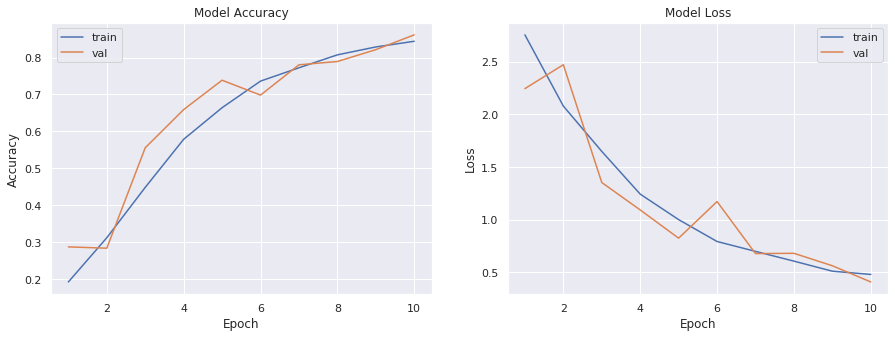

In [0]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
# summarize history for accuracy
axs[0].plot(range(1,len(modelAN.history.history['acc'])+1),modelAN.history.history['acc'])
axs[0].plot(range(1,len(modelAN.history.history['val_acc'])+1),modelAN.history.history['val_acc'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_xticks(np.arange(1,len(modelAN.history.history['acc'])+1),len(modelAN.history.history['acc'])/10)
axs[0].legend(['train', 'val'], loc='best')
# summarize history for loss
axs[1].plot(range(1,len(modelAN.history.history['loss'])+1),modelAN.history.history['loss'])
axs[1].plot(range(1,len(modelAN.history.history['val_loss'])+1),modelAN.history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_xticks(np.arange(1,len(modelAN.history.history['loss'])+1),len(modelAN.history.history['loss'])/10)
axs[1].legend(['train', 'val'], loc='best')
plt.show()

In [0]:
#Predict the class
Y_predAN = modelAN.predict_generator(valid_generatorAN)
y_predAN = np.argmax(Y_predAN, axis=1)
len(y_predAN)

4490

In [0]:
print('Confusion Matrix')
print(confusion_matrix(valid_generatorAN.classes, y_predAN))
print('Classification Report')
target_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
print(classification_report(valid_generatorAN.classes, y_predAN, target_names=target_names))

Confusion Matrix
[[88 49 67 43 48 49 53 43 22 36]
 [51 50 55 42 50 48 52 37 21 48]
 [65 39 55 35 57 50 56 46 19 42]
 [76 40 73 37 41 43 55 39 27 39]
 [73 30 73 35 51 53 50 53 18 30]
 [68 41 56 42 46 41 45 28 39 57]
 [73 61 53 43 56 48 32 27 30 42]
 [68 39 61 28 42 42 42 29 13 37]
 [60 44 45 30 28 40 53 27 20 36]
 [58 43 54 37 47 32 53 33 32 37]]
Classification Report
              precision    recall  f1-score   support

          c0       0.13      0.18      0.15       498
          c1       0.11      0.11      0.11       454
          c2       0.09      0.12      0.10       464
          c3       0.10      0.08      0.09       470
          c4       0.11      0.11      0.11       466
          c5       0.09      0.09      0.09       463
          c6       0.07      0.07      0.07       465
          c7       0.08      0.07      0.08       401
          c8       0.08      0.05      0.06       383
          c9       0.09      0.09      0.09       426

    accuracy                      

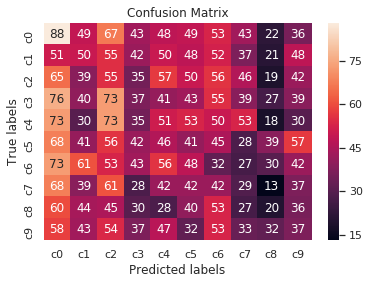

<Figure size 504x504 with 0 Axes>

In [0]:
ax= plt.subplot()
df_cm = pd.DataFrame(
        confusion_matrix(valid_generatorAN.classes, y_predAN), index=target_names, columns=target_names
)
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, ax = ax,fmt='d');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);


**References**

https://colab.research.google.com/drive/1CVm50PGE4vhtB5I_a_yc4h5F-itKOVL9

https://medium.com/@mgazar/lenet-5-in-9-lines-of-code-using-keras-ac99294c8086

https://keras.io/preprocessing/image/